In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
fake = pd.read_csv('/content/drive/MyDrive/dataset/Fake.csv')

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake['subject'].value_counts()

,count
subject,
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


<Axes: xlabel='subject', ylabel='count'>

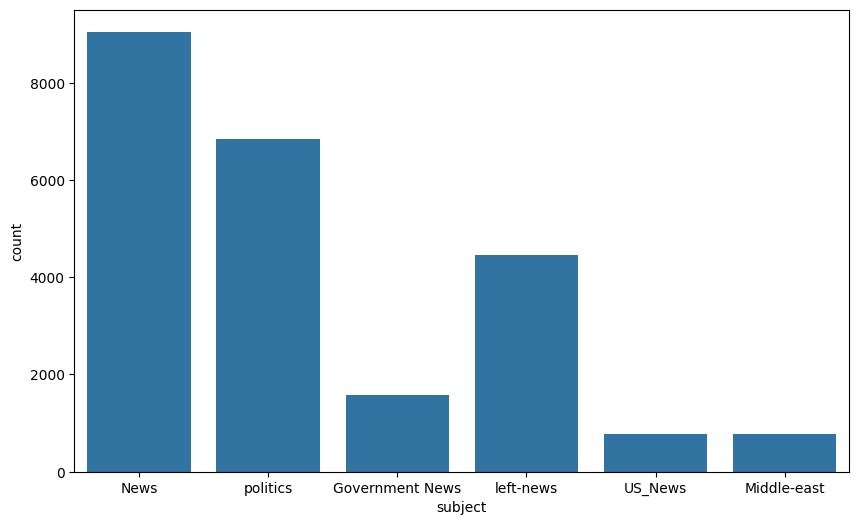

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'subject' ,data=fake)

In [ ]:
text = ' '.join(fake['text'].tolist())

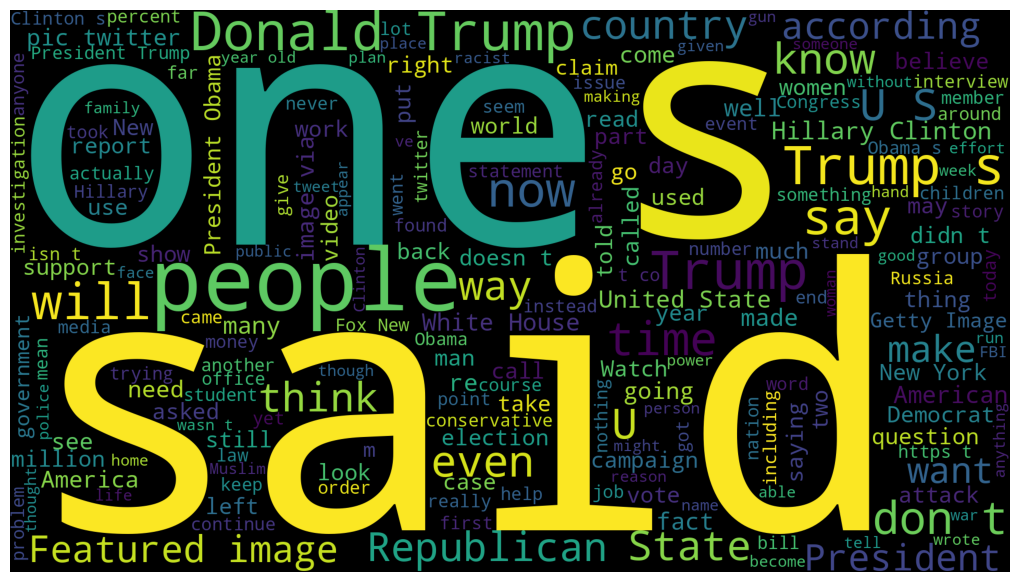

In [ ]:
wordcloud = WordCloud (width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
real = pd.read_csv('/content/drive/MyDrive/dataset/True.csv')

In [ ]:
text = ' '.join(real['text'].tolist())

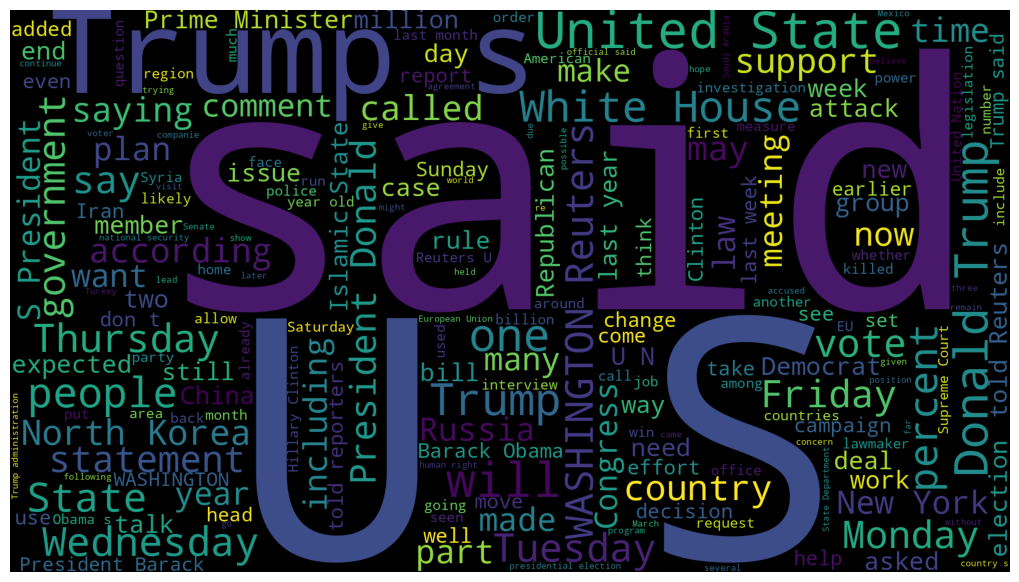

In [ ]:
wordcloud = WordCloud (width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
real.sample(5)

,title,text,subject,date
15825,"India ""disappointed"" with China blocking bid t...",NEW DELHI (Reuters) - India is disappointed ...,worldnews,"November 2, 2017"
16032,Bahrain court sentences 10 men on terrorism ch...,DUBAI (Reuters) - A Bahraini court sentenced 1...,worldnews,"October 31, 2017"
9655,Republican House Speaker Ryan not ready to sup...,WASHINGTON (Reuters) - The top elected Republi...,politicsNews,"May 3, 2016"
4745,White House says still expects House vote on h...,WASHINGTON (Reuters) - White House spokesman S...,politicsNews,"March 23, 2017"
8409,"In re-election bid, Ohio senator keeps safe di...","COLUMBUS, Ohio/WASHINGTON (Reuters) - Rob Port...",politicsNews,"August 23, 2016"


In [ ]:
unknown_publisher =[]
for index , row in enumerate(real.text.values):
  try:
    record = row.split("-",maxsplit=1)
    record[1]
    assert(len(record[0]) < 120)
  except :
    unknown_publisher.append(index)

In [ ]:
len(unknown_publisher)

222

In [ ]:
real.iloc[unknown_publisher].text

,text
7,The following statements were posted to the ve...
8,The following statements were posted to the ve...
12,The following statements were posted to the ve...
13,The following statements were posted to the ve...
14,"(In Dec. 25 story, in second paragraph, corre..."
...,...
20135,(Story corrects to million from billion in pa...
20500,"(This Sept 8 story corrects headline, clarifi..."
20667,"(Story refiles to add dropped word not , in ..."
21246,(Story corrects third paragraph to show Mosul...


In [ ]:
real = real.drop(8970,axis=0)

In [ ]:
publisher = []
tmp_text = []

for index, row in enumerate(real.text.values):
  if index in unknown_publisher:
      tmp_text.append(row)
      publisher.append('Unknown')
  else:
      record = row.split('-', maxsplit=1)
      publisher.append(record[0].strip())
      tmp_text.append(record[1].strip())

In [ ]:
real['publisher'] = publisher
real['text'] = tmp_text

In [ ]:
real.head( )

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
empty_fake_index = [index for index, text in enumerate (fake.text.tolist()) if str(text).strip()==""]

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + " " + fake['text']

In [ ]:
real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())



In [ ]:
real['class'] = 1
fake['class'] = 0

In [ ]:
real = real[['text','class']]
fake = fake[['text','class']]

In [ ]:
data = pd.concat([real, fake], ignore_index=True)

In [ ]:
data.sample(5)

,text,class
6406,highlights: u.s. president-elect trump's news ...,1
17154,austrian president tells kurz to heed 'europea...,1
39165,fbi informant blows the whistle on obama doj’s...,0
43713,cnn’s don lemon: is he an alcoholic or just a ...,0
16922,pakistan militant group finds likely replaceme...,1


In [ ]:
data['text'] = data['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))

In [ ]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


In [ ]:
!pip uninstall -y numpy thinc spacy tensorflow numba


Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0


In [ ]:
!pip install numpy==1.26.4 gensim==4.3.3 tensorflow==2.18.0 spacy==3.7.6 thinc==8.2.2 numba==0.60.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 5.6 MB/s eta 0:00:00
Reason for being yanked: Incorrect compatibility for transformer models
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 116.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 89.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.1/920.1 kB 53.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 101.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 22.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninsta

In [ ]:
import gensim

In [ ]:
y = data['class'].values

In [ ]:
x = [d.split() for d in data['text'].tolist()]

In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=x, vector_size=DIM, window=10, min_count=1)

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [ ]:
x = tokenizer.texts_to_sequences(x)

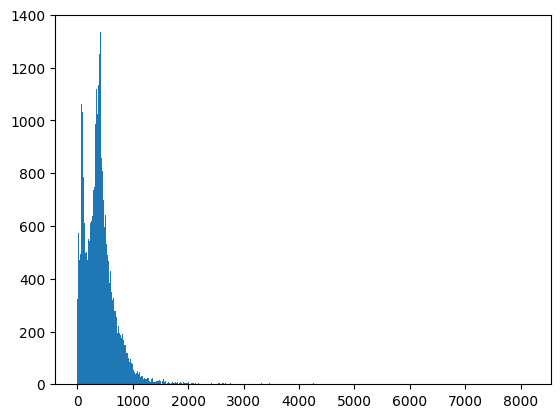

In [ ]:
plt.hist([len(x) for x in x],bins = 700)
plt.show()

In [ ]:
nos = np.array([len(x) for x in x])
len(nos[nos>1000])

1584

In [ ]:
maxlen = 1000
x = pad_sequences(x,maxlen=maxlen)

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size , DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

  return weight_matrix


In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(230761, 100)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense

model = Sequential()

# Explicitly define an input layer
model.add(Input(shape=(maxlen,)))

# Embedding Layer
model.add(Embedding(input_dim=vocab_size, output_dim=DIM,
                    weights=[embedding_vectors],
                    input_length=maxlen, trainable=False))

# LSTM Layer
model.add(LSTM(units=128))

# Dense Output Layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# Print model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 1000, 100)      │    23,076,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,193,477 (88.48 MB)

 Trainable params: 117,377 (458.50 KB)

 Non-trainable params: 23,076,100 (88.03 MB)

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y)

In [ ]:
model.fit(x_train,y_train,validation_split=0.3,epochs=6)

Epoch 1/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 33s 40ms/step - acc: 0.9150 - loss: 0.2116 - val_acc: 0.9635 - val_loss: 0.1041
Epoch 2/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 29s 39ms/step - acc: 0.9693 - loss: 0.0885 - val_acc: 0.9854 - val_loss: 0.0431
Epoch 3/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - acc: 0.9872 - loss: 0.0404 - val_acc: 0.9878 - val_loss: 0.0414
Epoch 4/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 40s 39ms/step - acc: 0.9929 - loss: 0.0217 - val_acc: 0.9884 - val_loss: 0.0392
Epoch 5/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - acc: 0.9934 - loss: 0.0206 - val_acc: 0.9804 - val_loss: 0.0596
Epoch 6/6
737/737 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - acc: 0.9915 - loss: 0.0258 - val_acc: 0.9917 - val_loss: 0.0229


In [ ]:
y_pred = (model.predict(x_test) >= 0.5 ).astype(int)

351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step


In [ ]:
accuracy_score(y_test,y_pred)

0.9906458797327394

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5892
           1       0.99      0.99      0.99      5333

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [ ]:
x1 = ['Kesari Chapter 2 box office collection day 6: Akshay Kumar, Madhavan-starrer holds steady, collects ₹42 crore']
x1 = tokenizer.texts_to_sequences(x1)
x1 = pad_sequences(x1,maxlen=maxlen)

In [ ]:
(model.predict(x1) >= 0.5 ).astype(int)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


array([[0]])

In [ ]:
import pickle

# Save model
model.save("fake_news_model.h5")

# Save tokenizer
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)